In [1]:
import torch as tr
import numpy as np

import itertools

from PM_models import *
from PM_tasks import *
from help_amtask import *

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
def load_trsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed=0):
  fdir = 'model_data/amtask_pieval/'
  fpath = "wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-trlen_%i-seed_%i-wm_emkw_0.000500-trsc.npy"%(
          wmsize,nmaps,switch,ntrials,trlen,seed)
  try:
    trsc_subj = np.load(fdir+fpath)
  except:
    return None
  return trsc_subj

def load_trsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20):
  L = []
  for seed in range(nnets):
    trsc_subj = load_trsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
    if type(trsc_subj) == type(None):
      continue
    L.append(trsc_subj)
  return np.array(L)

def load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed=0):
  fdir = 'model_data/amtask_pieval/'
  fpath = "wmsize_%i-nmaps_%i-switch_%i-ntrials_%i-trlen_%i-seed_%i-wm_emkw_0.000500-evsc.npy"%(
          wmsize,nmaps,switch,ntrials,trlen,seed)
  try:
    evsc_subj = np.load(fdir+fpath)
  except:
    return None
  return evsc_subj

def load_evsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20):
  L = []
  for seed in range(nnets):
    evsc_subj = load_evsc_subj(wmsize,nmaps,switch,ntrials,trlen,seed)
    if type(evsc_subj) == type(None):
      continue
    L.append(evsc_subj)
  return np.array(L)

In [30]:
wmsize,nmaps = 4,4
switch = 0
ntrials = 2
trlen = 10
trsc = load_trsc(wmsize,nmaps,switch,ntrials,trlen,nnets=20)
trsc.shape

(20, 50000, 2, 14)

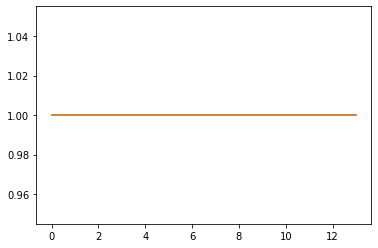

In [32]:
ep = -600
trac = trsc[:,ep:ep+500,:,:].mean(1)
net = 0
for ac in trac[net]:
  plt.plot(ac)

In [ ]:
def load_net():
  